# Números Aleatorios

### Introducción

Muchos procesos en la Física son procesos aleatorios, tales como el decaimiento de materiales radiactivos. 
De hecho, la teoría de la Física Cuántica predice la *probabilidad* del decaimiento en un periodo de tiempo, pero el momento exacto en que el proceso ocurre no puede se puede predecir.

Quizás más importante es el hecho de que otros procesos físicos no son aleatorios, pero los tratamos como procesos aleatorios para realizar predicciones. Realizar predicciones con esta suposición constituye la teoría de la Física Estadística.

Un ejemplo es el moovimiento Browniano. La dinámica que parece ser aleatoria de una partícula en un medio en realidad es determinística, sin embargo, entender dicha dinámica de primeros principios involucra conocer todas las propiedades microscópicas de un sistema de un sistema macroscópico; lo cual puede ser intratable. En casos como este, las predicciones de la Física Estadística, asumiento que muchas variables microscópicas son estocásticas nos permite realizar predicciones con alta precisión. 

**Los procedimientos para evaluar propiedades como las de los ejemplos anteriores nos lleva al tema de como generar números aleatorios**.

---
Algunos ejemplos donde los números aleatorios aparecen como medida para ciertas aplicaciones son:
* El muestreo de algún dominio
* Integración de Monte Carlo 
* Simulaciones de Monte Carlo: difusión, decaimiento radiactivo, movimiento Browniano
* Algoritmos estocásticos
* Criptografía
---
Cuando podemos decir que una secuencia de números aleatorios es útil?
* Si la probabilidad de los números siguen alguna distribución probabilística
* El número que sigue en una secuencia no puede ser predecido
* Existe una forma rápida de generarlos (puede que necesitemos billones de ellos)
* El periodo es muy largo (puede que necesitemos billones de ellos)
* **No existen correlaciones estadísticas entre ellos**
---
Cual es son algunos problemas con los de números apropiadamente aleatorios?
* Pueden ser lentos y costosos de generar
* Difícil/imposible de reproducir, lo cual hace diseñar aplicaciones un proceso muy complejo
* En la mayoría de los casos, es muy difícil determinar si fueron generados bajo alguna distribución

### Puede una computadora (clásica) generar números aleatorios?

No (<font size="0.5">Una computadora cuántica si puede</font>).

Una computadora clásica no puede generar secuencias aleatorias. Entonces existen dos opciones:

* Econtrar procesos físicos cuya naturaleza sea aleatoria (de caracter, e.g., cuántico). La computadora guarda datos para generar un número aleatorio (vea, e.g., https://qrng.anu.edu.au/)
* Usar algún algoritmo para generar una secuencia de números que aproximadamente tiene las propiedades de los números aleatorios. A estos algorimos se le conocen como **generadores de números pseudoaleatorios** y a las secuencias que genera, **números pseudoaleatorios**.

## Pruebas de aleatoriedad

Existen diversas pruebas estadísticas que nos ayudan a identificar si una secuencia de números se comporta como una secuencia de números aleatorios. Una de estas se conoce como **correlaciones de pares**:
$$
\epsilon(N, n) = \frac1N \sum_{i=1}^{N}x_i x_{i+n} - \mathrm E[x^2],
$$
donde
* $N$ corresponde al número de puntos o el tamaño de la secuencia,
* $n$ corresponde a la distancia de correlación y
* $\mathrm E[X]$ corresponde al valor de expectación de $X$.

**Queremos evitar correlaciones entre números aleatorios**
* La razón es que los verdaderos números aleatorios no tienen, en principio, correlaciones; por lo cual es importante que nuestra representación (aproximación) tampoco las contenga.

El siguiente es un ejemplo de como se pueden ver las correlaciones en números aleatorios (Ref: Katzgrabber, "Random numbers in scientific computing: an introduction" arxiv:1005.4117)

(Izquierda: presencia de correlaciones. Derecha: sin correlaciones)

<div>
<img src="Fig2.png" width="500"/>
</div>

### Otras pruebas de aleatoriedad

Otra prueba muy común para probar la aleatoriedad de una secuencia de números corresponde al cálculo de **los momentos de la distribución**. 

El momento $k$ de una secuencia de números se define como el valor de expectación
$$
\mu(N, k) = {\rm{E}}[x^k],
$$
es decir, es un valor de expectación de una potencia mayor de la distribución. Existen formas de distinguir patrones observando como se comportan los momentos de una secuencia de números.

## El generador lineal congruente (*linear congruential generator*)

Un generador de números pseudoaleatorios útil posee las siguientes propiedades:
1. La secuencia es reproducible: con base en un valor de inicialización, se puede generar la misma secuencia de números. Esto es importante porque nos permite **reproducir los cálculos**. Al valor de inicialización se le conoce como *seed* (semilla, en inglés).
2. Genera secuencias que no contiene correlaciones apreciables y se comportan lo más cercano posible a verdaderos números aleatorios.
3. Periodo largo.
4. Los números se pueden generar sin alto costo computacional

Históricamente, uno de los generadores más sencillos es el generador lineal congruente (Thompson & Rotenberg 1958). Los números se generan con base en la siguiente regla:
* $x_{i+1} = (ax_i + c) \mod m$, donde $\rm{mod}$ es la operación de división residual
  - En `Python`, dicha operación se escribe `x[i+1] = (a*x[i] + c) % m`
* $a, c$ y $m$ son constantes y números enteros
* $x_0$ se conoce como el valor de inicialización (seed) y $m$ es un número entero. Generalmente, se escoge $m >> 1$, este valor determina el periodo de la secuencia
  - La calidad de las secuencias generadas por el generador lineal congruente es muy sensible a la escogencia de los parámetros
* La escogencia de los parámetros suele ser un poco *esotérica*:
  - Usualmente se escoge $a - 1$ como un múltiplo de $p$ para cada divisor primo $p$ de $m$
  - $c$ se escoge como un número coprimo de $m$
  
El generador lineal congruente funciona relativamente bien con una escogencia apropiada de sus parámtros, e increiblemente mal si estos parámetros no se escogen bien.

* Lo importante es que la secuencia no es aleatoria del todo: se genera con una regla completamente determinística. La idea es aproximar los verdaderos números aleatorios con secuencias de este tipo

Veamos como implementar esta regla en `Python`.

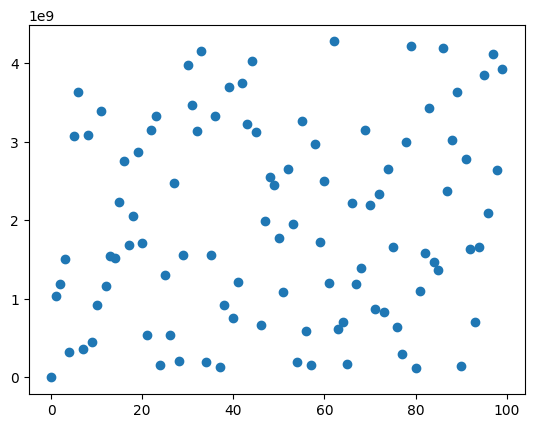

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lcg(N, seed = 11):
    a = 1664525
    c = 1013904223
    m = 4294967296
    sequence = np.zeros(N)
    sequence[0] = seed
    for i in range(1, N):
        sequence[i] = (a * sequence[i - 1] + c) % m
        
    return sequence

seq = lcg(100)
plt.plot(seq, 'o')
plt.show()

Note que la secuencia solo genera números enteros, pero se pueden rescalar de forma muy sencilla para generar números en un rango de valores.

* Algunos beneficios:
  - Reproducible: esto hace que testear código sea más sencillo
  - Extremadamente sencillo de implementar
  - Periodos largos
* Desventaja:
  - La calidad de la secuencia es muy sensible al valor de inicialización y a los parámetros escogidos
  
### Números pseudoaleatorios en la práctica

Para efectos prácticos, como muchas aplicaciones en este curso, es mejor utilizar una biblioteca especializada para generar números aleatorios.

`NumPy` utiliza otra metodología para generar secuencias de números aleatorios:
  - Utiliza un generador llamado *Mersenne-Twister
  - Dicho algoritmo se considera lo suficientemente robusto para muchas aplicaciones en la Física
  - API muy sencilla
  
Por ejemplo, para generar una secuencia como la anterior basta con hacer:

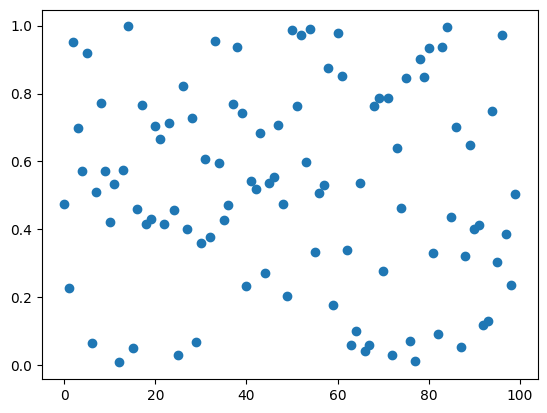

In [2]:
def mt_numpy(N, seed = 4219):
    return np.random.uniform(size = N)

seq_2 = mt_numpy(100)
plt.plot(seq_2, 'o')
plt.show()

En el módulo `np.random` existen diversas formas de:
* Asignar valores de inicialización
* Generar números con base en distintas distribuciones
* Utilizar distintos generadores
* **Código compilado**

Referencias:

https://numpy.org/doc/stable/reference/random/index.html

https://docs.python.org/3/library/random.html

## Muestreo de números pseudoaleatorios con base en una distribución de probabilidad no uniforme

En general, los generadores de números aleatorios generan sequencias de una distribución de probabilidad uniforme: es decir, dentro del rango de números posibles, **cada número en la secuencia tiene la misma probabilidad de aparecer**.

Sin embargo, es importante para muchas aplicaciones generar números pseudoaleatorios que siguen alguna distribución de probabilidad.

* La idea es utilizar alguna transformación para pasar de una distribución uniforme a una que no es uniforme
* Considere una fuente de números pseudoaleatorios $z$ generados bajo una distribución $z$ con una densidad de probabilidad $q(z)$. Es decir, la probabilidad de generar un número en el intervalo $z$ + ${\rm{d}}z$ es
$$
q(z){\rm{d}}z
$$
* Para una distribución uniforme en el intervalo $[0, 1)$, $q(z) = 1$ dado que para cualquier ${\rm{d}}z$ tenemos la misma probabilidad de escoger el cualquier número
* Ahora consideremos una tranformación de $z$a una nueva variable $x$, usando
$$
x = x(z)
$$
* $x$ también es un número aleatorio pero queremos que venga de una distribución de probabilidad no uniforme, la cual llamamos $p(x)$
* La probabilidad de generar un valor entre $x$ y $x + {\rm{d}x}$ es, por definición, igual a la probabilidad de generar un valor entre la correspondiente $z + {\rm{d}z}$:
$$
p(x){\rm{d}}x = q(z){\rm{d}}z, \quad \text{donde}\ x=x(z).
$$
* Objetivo: encontrar una función $x(z)$ de manera que $x$ tenga la distribución deseada
* De esta forma, podemos utilizar una distribución uniforme tal como `random()` para generar un valor $z$ y transformarlo a $x$ usando:
$$q(z) = 1 \quad \text{en el intervalo}\quad [0,1)$$
$$q(z){\rm{d}}z = p(x){\rm{d}}x$$
$$\Rightarrow \int_0^z 1 {\rm{d}}z' = z = \int_0^{x(z)} p(x'){\rm{d}} x'.$$
* Basta con sustituir $p(x)$ con la distribución de probabilidad deseada e integrar!

### Ejemplo: Distribución de probabilidad exponencial

La probabilidad de distribución exponencial es importante en las ciencias. Por ejemplo, el tiempo que pasa entre este momento y el momento en el cual un terremoto puede ocurrir, sigue una distribución de probabilidad exponencial.

Para generar números aleatorios que siguen esta distribución hacemos
$$q(z) = 1 \quad \text{en el intervalo}\quad [0,1)$$
$$p(x) = a\exp(-a x)  \quad \text{en el intervalo}\quad [0,\infty)$$
$$\Rightarrow\ z = \int_0^{x(z)}a\exp(-ax') {\rm{d}}x' = 1 - \exp(-ax)$$
$$\Rightarrow\ x = -\frac{\ln(1-z)}a.$$

Es decir, para generar un número pseudoaleatorio dentro de una distribución exponencial:
* Generamos un número pseudoaleatorio de una distribución uniforme
* x(z) pertenece a la distribución exponencial

### Ejemplo: Distribución de probabilidad Gaussiana

Aún más importante es la distribución de probabilidad Gaussiana, con muchas aplicaciones que requieren números generados bajo esta distribución. Tenemos
$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}.
$$
Al aplicar la regla anterior obtenemos
$$
\frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{x(z)} e^{-\frac{x^2}{2\sigma^2}} {\rm{d}}x = z.
$$
Desafortunamente, no podemos resolver esta integral de forma análitica.

Sin embargo, podemos usar un truco para resolver el problema.
Imaginemos que tenemos dos números pseudoaleatorios de una distribución Gaussiana, $x$ y $y$ con el mismo valor de $\sigma$. La probabilidad de que la posición $(x,y)$ caiga dentro de un elemento ${\rm{d}x} {\rm{d}y}$ en el plano $xy$ es
\begin{align}
p(x){\rm{d}x} \times p(y){\rm{d}y} &= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}} \times \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^y}{2\sigma^2}} {\rm{d}x}{\rm{d}y} \\
&= \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}{\rm{d}x}{\rm{d}y}.
\end{align}
Ahora podemos hacer un cambio de variables a **coordenadas polares**.

El punto entre $r + {\rm{d}r}$ y $\theta + {\rm{d}\theta}$ cae en el segmento $r{\rm{d}r}{\rm{d}\theta}$ del plano. Tenemos
$$
x^{2} + y^{2} \to r^{2} \quad \text{con} \quad {\rm{d}x}{\rm{d}y} \to r{\rm{d}r}{\rm{d}\theta}.
$$
Entonces
\begin{align}
p(r, \theta) {\rm{d}r}{\rm{d}\theta} &= \frac{1}{2\pi\sigma^2} e^{-\frac{r^2}{2\sigma^2}} r{\rm{d}r}{\rm{d}\theta} = \frac{r}{\sigma^2} e^{-\frac{r^2}{2\sigma^2}} \times \frac{{\rm{d}\theta}}{2\pi} \\
&= p(r) {\rm{d}r} \times p(\theta) {\rm{d}\theta}.
\end{align}
* Las distribuciones de probabilidad en el componente $r$ y $\theta$ se factorizan, de manera tal que podemos generar números pseudoaleatorios de manera separada para $r$ y $\theta$
 - Para $\theta$: basta con generar un número de una distribución uniforme en el intervalo $[0, 2\pi)$
 - Para $r$: debemos utilizar la tranformación que vimos anteriormente
 
Para $r$, la transformación es:
$$
\frac{1}{\sigma^2} \int_{0}^{r} e^{-\frac{r^2}{2\sigma^2}} r {\rm{d}}r = 1 - e^{-\frac{r^2}{2\sigma^2}} = z.
$$
Entonces, para $r$ tenemos
$$
r = \sqrt{-2\sigma^2\ln{(1-z)}},
$$
donde $z$ se genera de una distribución uniforme en el intervalo $[0,1)$. Dados estos valores, transformamos de vuelta a $(x,y)$:
$$
x = r\cos(\theta), \quad y = r\sin(\theta).
$$
De esta forma, generamos dos números pseudoaleatorios con una distribución Gaussiana.

## Introducción a la integración de Monte Carlo

La idea corresponde a utilizar números aleatorios como puntos en los cuales evaluar el integrando.

### Motivación

Ya conocemos muchos métodos de integración numérica. Porque necesitamos uno más?

---
**Razón #1**: MUCHO más eficiente para integrales multidimensionales
Mientras que los métodos que ya conocemos son muy costosos para evaluar integrales en múltiples dimensiones.
* Por ejemplo, para una integral de dimensión $d$, requerimos O(N^d) puntos para la integración tradicional
  - e.g., trapezoides, Simpson o cuadratura: Para $N=10$, se requeriría $10^10$ puntos en la grilla para un integral 10-dimensional!
  - El error al evaluar esta integral con la regla de trapezoides sería $\epsilon = O(h^2) \propto 1 / N^{2 / d}$, es decir, $\epsilon \propto 1 / N^{1/5}$
  - Con Monte Carlo, el error $\epsilon \propto 1 / N^{1/2}$, sin importar $d$!
  
---
**Razón #2**: El método funciona muy bien para funciones patológicas o que varían muy rápido

---
**Razón #3**: Es mucho más fácil de implementar al integrar sobre dominios complicados, fronteras de integración complicadas.

<div>
<img src="Fig3.png" width="450"/>
</div>

### Existen muchas versiones de la integración de Monte Carlo

* Monte Carlo "estándar"
* Monte Carlo de punto medio
* Monte Carlo con muestreo de importancia (*importance sampling*)

### MC Estándar

Para aplicar la técnica de Monte Carlo requerimos que la función de integración esté definida en una región finita.

Por ejemplo, supongamos que queremos integrar
$$
f(x) = \sin^2\left[\frac{1}{(2-x)x}\right]
$$
desde $x = 0$ hasta $x = 2$. El valor máximo de $f(x)$ es 1, de manera tal que podemos acotar la región de integración a una caja de área $A = c \times d$ donde $c = 1$ y $d = 2$.

Veamos el gráfico:
<div>
<img src="Fig4.png" width="450"/>
</div>

La región en gris es el área bajo la curva, es decir el valor de la integral. Definamos
$$
I = \int_{x = 0}^{x = 2} {\rm{d}x'}f(x')
$$
Si tenemos un número aleatorio, la probabilidad de que ese punto se encuentra dentro de la región de integración es 
$$
p = \frac{I}{A}.
$$
Con esto, podemos definir un algoritmo:
1. Escoger $N$ puntos $(x,y)$ dentro de las fronteras de la caja ($N$ debe ser grande)
2. Contar el número de puntos $k$ que se encuentran en la zona gris
3. La fracción de puntos $k$ en la zona gris aproximan la probabilidad $p$, de manera tal que
$$
p = \frac{I}{A} \approx \frac{k}{N} \Rightarrow I\approx \frac{kA}{N}.
$$

#### Estimación del error

El error estimado con base en argumentos probabilísticos es
$$
\sigma = \sqrt{\frac{(A-I)I}{N}}.
$$

* Note que el error varía con $N$ como $N^{-1/2}$.
* En comparación:
  - Regla de trapezoides: $N^{-2}$
  - Regla de Simpson: $N^{-4}$
  
La integración de Monte Carlo, por ende, se utiliza en casos solamente donde es requerida.

### MC de punto medio

La idea es utilizar la definición del promedio (o punto medio):
$$I = \int_a^b f(x)\text d x,$$
$$\left<f\right> = \frac1{b-a}\int_a^b f(x) \text d x = \frac{I}{b-a}$$
$$\Rightarrow\ I = (b-a)\left<f\right>$$

* Se utilizan números pseudoaleatorios de $x$ para estimar $\left<f\right>$. Se evalúa $f$ en los $N$ puntos $x$ y se calcula
$$\left<f\right>\approx\frac1N\sum_{i=1}^N f(x_i) \ \Rightarrow \ I\approx \frac{b-a}{N}\sum_{i=1}^N f(x_i).$$

Difiere del método anterior en el hecho de que no escogemos puntos aleatorios $(x,y)$, si no solamente $x$ y se evalúa el valor de punto medio.

#### Estimación del error

De nuevo, con argumentos probabilísticos se puede demostrar que el error (representado como la desviación estándar del valor medio)
$$\sigma = (b-a)\sqrt{\frac{\text{var} f}N}$$
$$\text{var} f = \left<f^2\right> - \left< f \right>^2.$$

De igual forma, el error decae como $N^{-1/2}$.

### MC con importancia de muestreo

* Este método es útil cuando el integrando contiene divergencias
* La idea es muestrear la función en los lugares donde es más importante

Veamos el siguiente ejemplo trivial con fines ilustrativos:
$$f(x) = 1\quad \text{para}\quad c<x<d, \qquad f(x) = 0\quad \text{de otra forma}.$$

La función se ve de la siguiente forma:

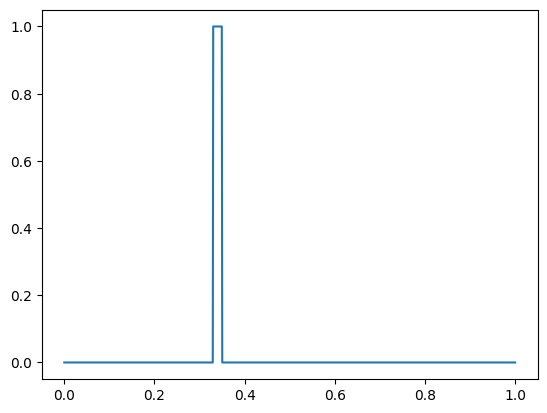

In [3]:
def func(c, d):
    x = np.linspace(0, 1, 1000)
    f = 0.0*x
    for i, xs in enumerate(x):
        if c < xs < d:
            f[i] = 1.0
            
    return x, f

x_vals, y_vals = func(0.33, 0.35)
plt.plot(x_vals, y_vals)
plt.show()

En este caso, es muy ineficiente muestrear todo el rango de valores dado que la gran mayoría no van a formar parte de la integral.
* La solución es muestrar las regiones "importantes" con mayor frecuencia, es decir, encontrar una distribución no uniforme para generar los números pseudoaleatorios
* Esto se puede realizar mediante una función de peso $w(x)$, escribiendo
$$I = \int_a^b f(x)\text d x = \underbrace{\left<\frac{f(x)}{w(x)}\right>_w}_{\text{promedio}\\ \text{pesado}}\int_a^b w(x)\text d x.$$

* El promedio pesado $\left<X\right>_w$ corresponde al promedio de $X$ sobre los puntos que son muestreados con mayor frecuencia, siguiendo la función de peso (o distribución de probabilidad de peso) $w$.
  - El término $\left<f/w\right>_w$ implica que entre más muestreamos una región, menor el peso de esa región en el cálculo del promedio final
* El objetivo es encontrar una función de peso que elimine las patologías de la función en el integrando $f(x)$. 

#### Ejemplo

Considere 
$$I = \int_0^1 \frac{x^{-1/2}}{1 + \exp(x)}\text d x,$$
la cual diverge en el límite $x \to 0$ debido al numerador.

* Lo que hacemos es $w(x) = x^{-1/2}$. Entonces:
$$\left<\frac{f(x)}{w(x)}\right>_w = \frac1N \sum_{i=1}^{N}\frac{f(x_i)}{w(x_i)} = \frac1N \sum_{i=1}^{N}\frac{1}{1 + \exp(x_i)},$$
la cual es una función mucho mejor comportada que 
$$\left<f(x)\right> = \frac1N \sum_{i=1}^{N}\frac{x^{-1/2}}{1 + \exp(x_i)}.$$

##### Importante
* No es lo mismo un promedio que un promedio pesado: $\left<\right>_w \neq \left<\right>$
* En el promedio pesado, los números se generan de una distribución no uniforme
* **En la práctica:**
  - Una vez que se escoge una función de peso, se debe evaluar la **distribución de probabilidad no uniforme** de la cual muestreamos los números pseudoaleatorios
  - Esto se realiza mediante el procedimiento que describimos anteriormente:
  $$p(x) = \frac{w(x)}{\int_a^b w(x)\text d x}$$
  - Es decir, debemos utilizar el método de transformación que estudiamos al inicio de la clase, para transformar de una variable aleatoria uniforme $z$ a una no uniforme $x$
  
### Estimación del error

Se puede probar:
$$\sigma = \sqrt{\frac{\text{var}(f/w)}{N}}\int_a^b w(x)\text d x.$$
Es decir, también decrece como $N^{-1/2}$.

# Laboratorio

Utilice el método de Monte Carlo estándar para evaluar el volumen de una hiperesfera unitaria de dimensión $d$. 

En este caso, solo requerimos números pseudoaleatorios de una distribución uniforme así que podemos utilizar `np.random.uniform()` para invocar un número pseudoaleatorio.

Considere $d = 2$, $d = 3$, $d = 5$ y $d = 10$. Utilice diversos valores de $N$ hasta un máximo de $N = 10^{7}$.